# **Wholesale Customer Segmentation**
This notebook focuses on processing and analyzing the Wholesale Customers Dataset, which contains information about annual spending on different product categories by customers. The goal is to preprocess and clean the data, detect any anomalies, segment customers into groups, and reduce dimensionality to visualize the results. We will use various techniques such as anomaly detection, clustering, and dimensionality reduction for these tasks.

1.  **Preprocess and clean the data:** Handle duplicates, missing values, and normalize features.
2.  **Anomaly Detection:** Identify and remove abnormal instances using statistical, distance-based, and machine learning techniques.
3.  **Clustering for Customer Segmentation:** Use clustering techniques like **DBSCAN** and **Hierarchical Clustering** to group similar customers.
4.  **Dimensionality Reduction:** Apply **PCA** and **t-SNE** to visualize the clusters and analyze customer patterns.


## **Step 1: Data Cleaning and Preprocessing**
### **1.1: Load the Dataset**
We begin by loading the dataset and examining its structure.

In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Wholesale customers data.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)


First few rows of the dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Data types of the columns:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


### **1.2: Check for Duplicates**
We remove duplicate rows to ensure that each customer record is unique.

In [26]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Remove duplicates if any
df.drop_duplicates(inplace=True)

print(f"Number of duplicates removed: {duplicates}")

Number of duplicates removed: 0


### **1.3: Handle Missing Values**
Missing values in numerical columns are imputed using the column mean to avoid data loss.

In [27]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Fill missing values in numerical columns with the column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify that no missing values remain
print("Number of missing values after imputation:")
print(df.isnull().sum())


Missing values in each column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Number of missing values after imputation:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


### **1.4: Descriptive Statistics**
Descriptive statistics help summarize the data and check for normality. We will compute the mean, standard deviation, minimum, and maximum for each numerical feature.

In [28]:
# Descriptive statistics to understand the distribution of the data
descriptive_stats = df.describe()
print(f"Descriptive statistics:\n{descriptive_stats}")


Descriptive statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000  

### **1.5: Data Normality Analysis**
To better understand the distribution of the data, we visualize histograms for each feature.

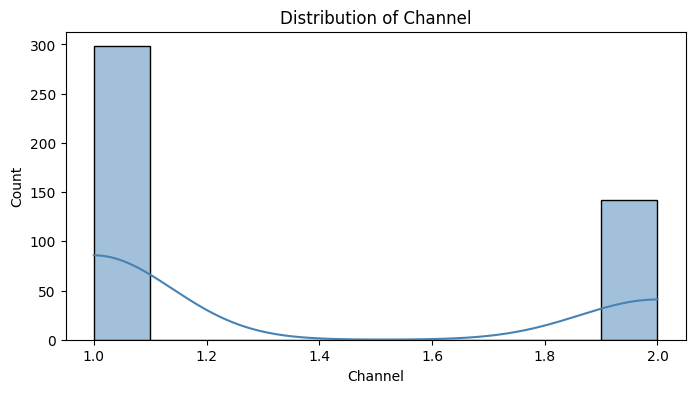

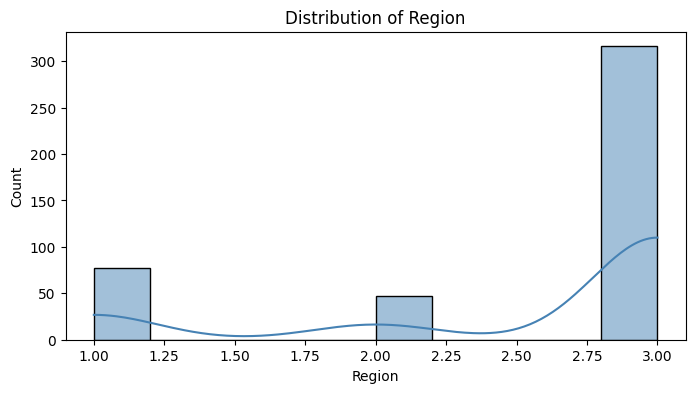

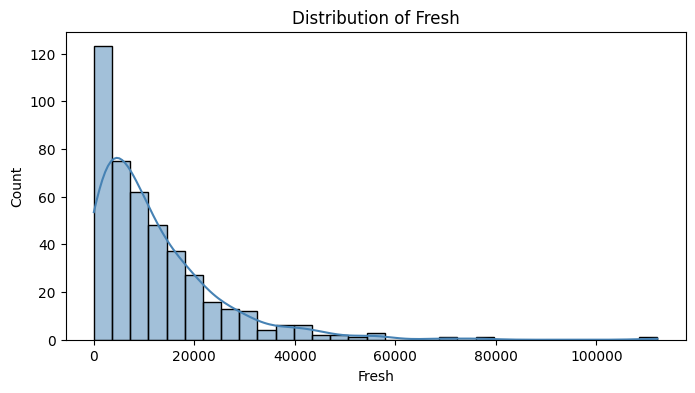

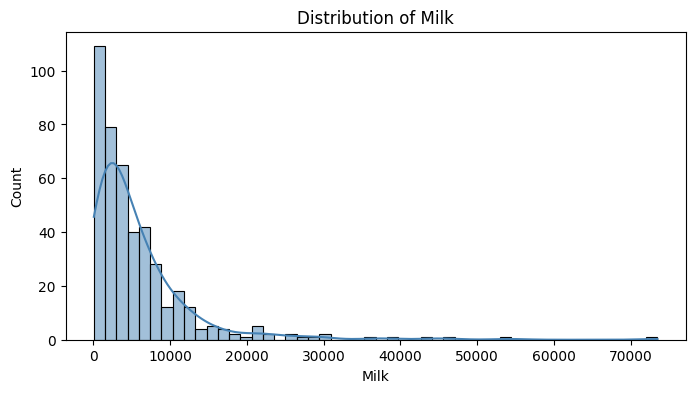

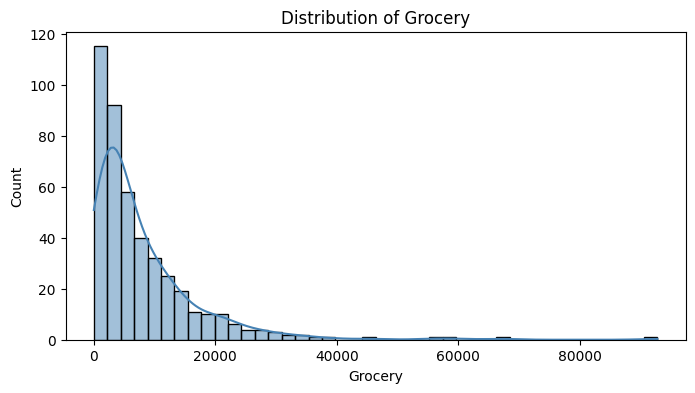

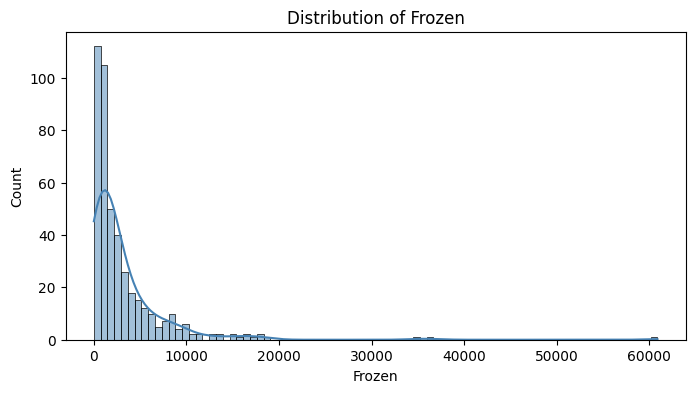

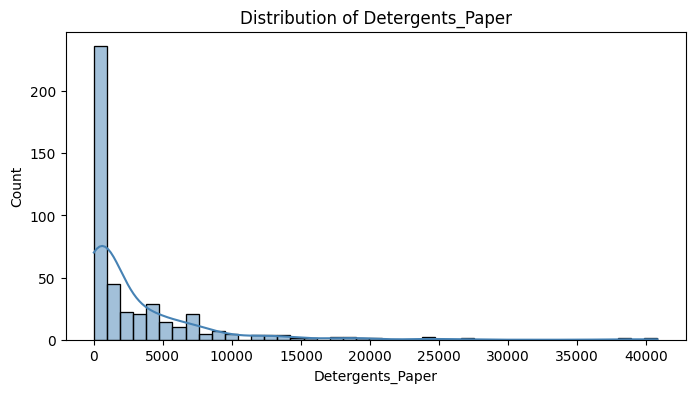

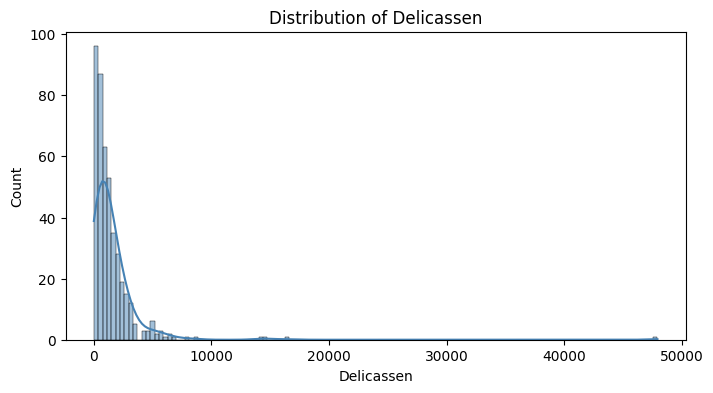

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Plot the distribution for each numeric feature
for column in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, color='steelblue')
    plt.title(f'Distribution of {column}')
    plt.show()


### **1.6: Normalize and Standardize Numerical Features**
Normalization and standardization help ensure that all numerical features are on comparable scales. We will standardize the data using the StandardScaler and normalize it using the MinMaxScaler.

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization: Rescales data to have a mean of 0 and a standard deviation of 1
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

print("\nDataset after standardization:")
print(df_standardized.head())

# Normalization: Scales data to the [0, 1] range
scaler_normal = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_normal.fit_transform(df), columns=df.columns)

print("\nDataset after normalization:")
print(df_normalized.head())


Normalized data preview:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


## **Step 2: Anomaly Detection**
In this step, we will use several anomaly detection techniques to identify unusual instances in the dataset. These techniques will include statistical methods, distance-based methods, density-based methods, and machine learning models.
### **2.1: Statistical Methods**
* **Z-Score Method:** Identify data points that lie beyond 3 standard deviations from the mean.
* **Grubbs Test:** Identify the most extreme data points.
* **Boxplot Analysis:** Detect outliers using interquartile range (IQR).

Outliers detected using Z-score:
Channel              0
Region               0
Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64


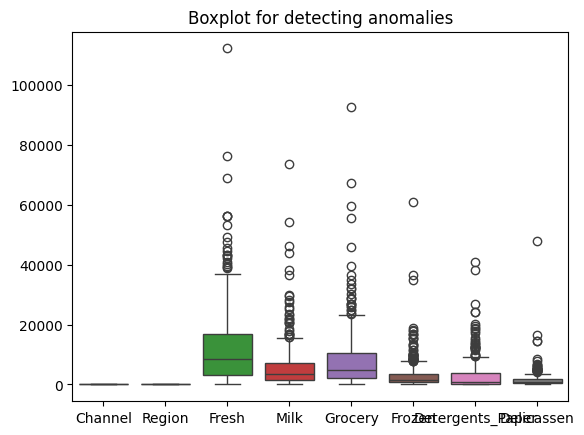

In [59]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.stats import norm

# Calculate Z-scores for anomaly detection
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers_zscore = (z_scores > 3).sum(axis=0)

print(f"Outliers detected using Z-score:\n{outliers_zscore}")

# Grubbs' test for anomalies
from pyculiarity import detect_ts
df_grubbs = df.select_dtypes(include=[np.number])  # Apply Grubbs' test on numerical features

# Boxplot-based anomaly detection
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplot for detecting anomalies')
plt.show()


### **2.2: Distance-Based Methods**
* **K-Nearest Neighbors (KNN):** Outliers are points that are far from their nearest neighbors.
* **Local Outlier Factor (LOF):**
 Measures the local deviation of data points with respect to their neighbors.

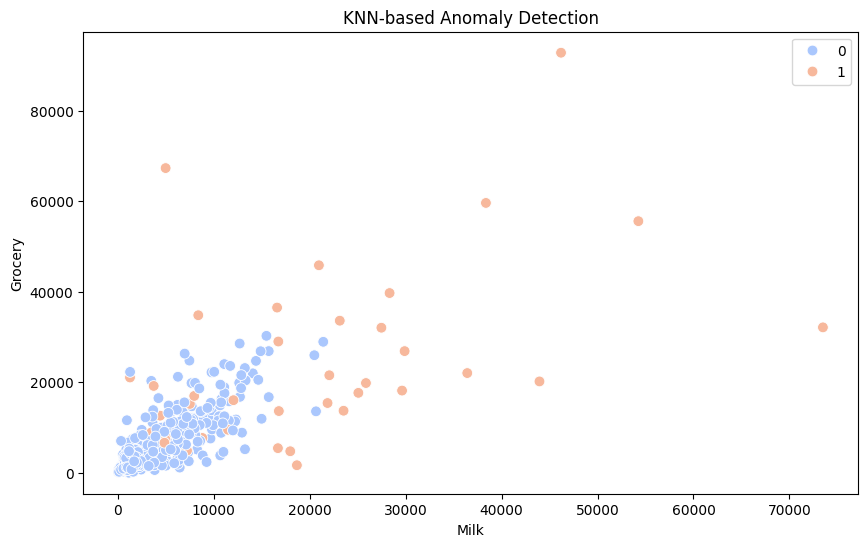

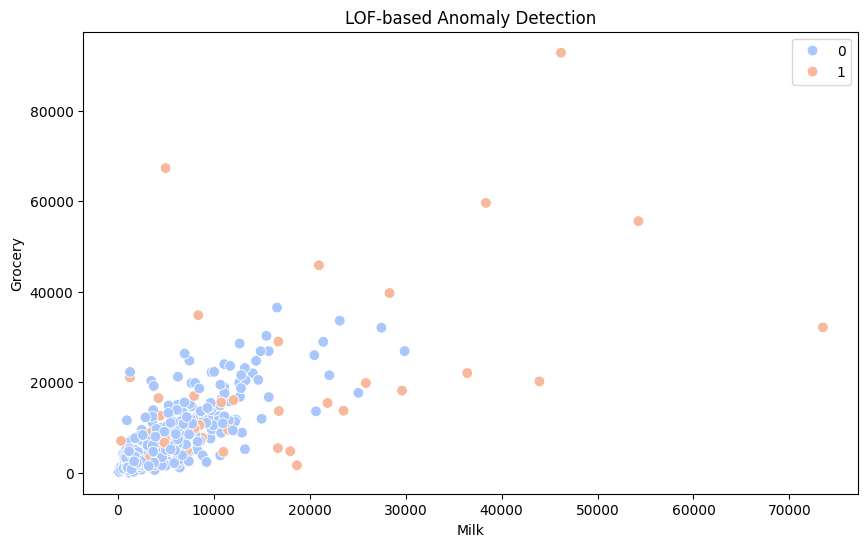

In [60]:
# Apply KNN for anomaly detection
knn_model = KNN()
knn_model.fit(df_standardized)
knn_outliers = knn_model.labels_

# Apply LOF (Local Outlier Factor)
lof_model = LOF()
lof_model.fit(df_standardized)
lof_outliers = lof_model.labels_

# Plot KNN-based anomaly detection results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Milk'], y=df['Grocery'], hue=knn_outliers, palette='coolwarm', s=60)
plt.title('KNN-based Anomaly Detection')
plt.show()

# Plot LOF-based anomaly detection results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Milk'], y=df['Grocery'], hue=lof_outliers, palette='coolwarm', s=60)
plt.title('LOF-based Anomaly Detection')
plt.show()


### **2.3: Density-Based Methods**
* **DBSCAN:** Points in low-density regions are marked as outliers.
* **Isolation Forest:** Isolates anomalies by randomly partitioning the data.

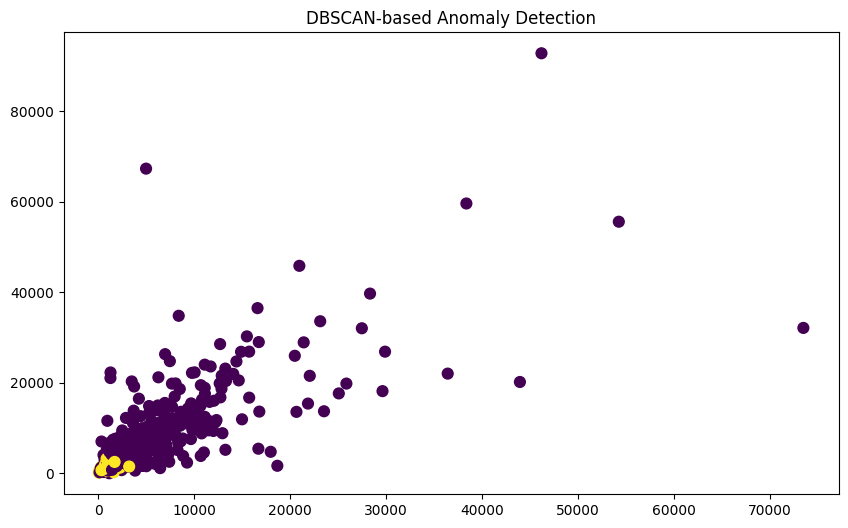

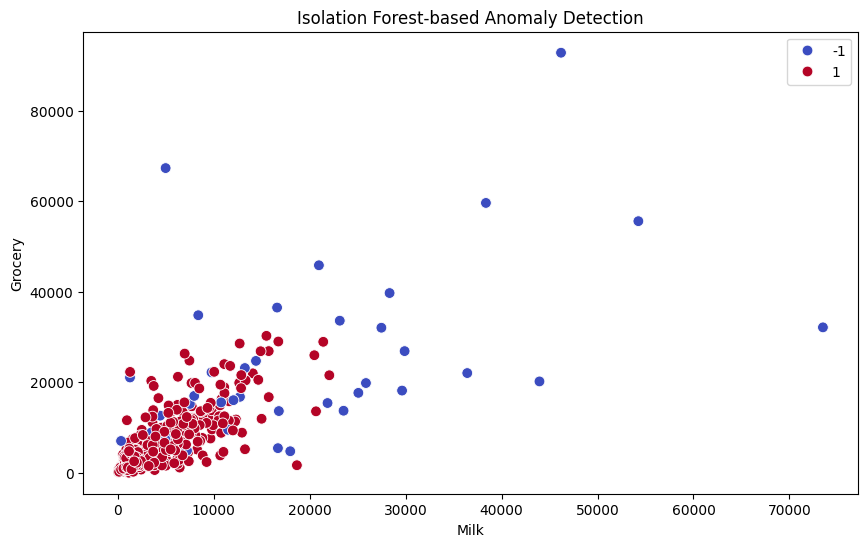

In [61]:
# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5, algorithm='ball_tree')
dbscan_labels = dbscan.fit_predict(df_standardized)

# Plot DBSCAN-based anomaly detection
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Grocery'], c=dbscan_labels, cmap='viridis', s=60)
plt.title('DBSCAN-based Anomaly Detection')
plt.show()

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
iso_forest_labels = iso_forest.fit_predict(df_standardized)

# Plot Isolation Forest-based anomaly detection
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Milk'], y=df['Grocery'], hue=iso_forest_labels, palette='coolwarm', s=60)
plt.title('Isolation Forest-based Anomaly Detection')
plt.show()


### **2.4: Machine Learning Models**
* **Autoencoders:** Use neural networks to detect deviations from normal patterns.
* **One-Class SVM:** Classifies points as inliers or outliers.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Number of outliers detected using Autoencoder: 22
Number of outliers detected using One-Class SVM: 44


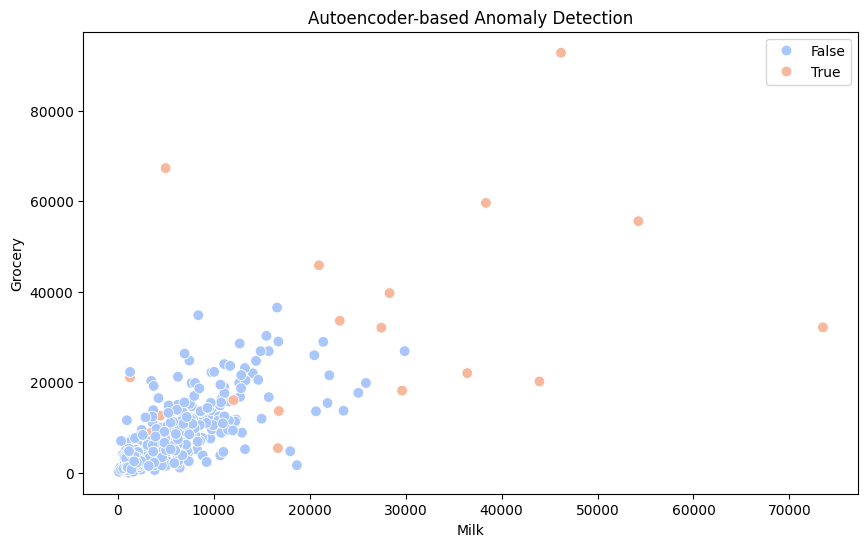

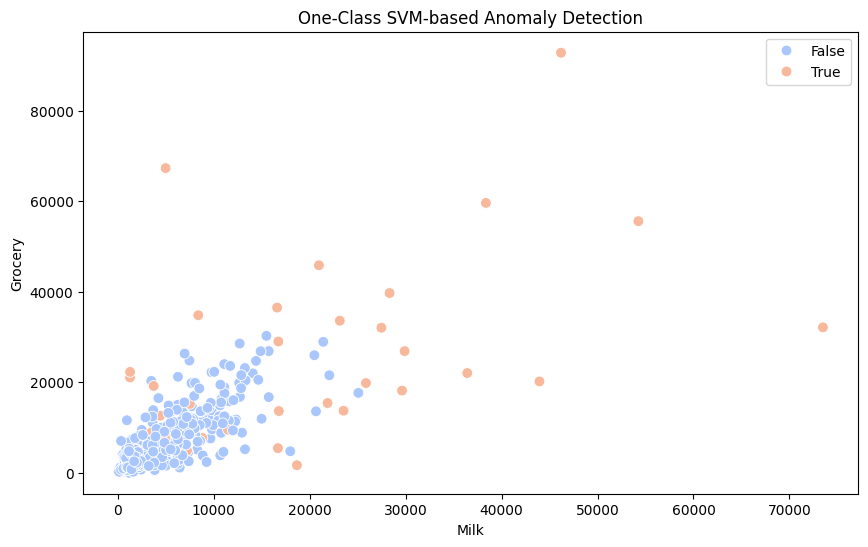

In [72]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Normalize the data for Autoencoder
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_standardized)

# Build an Autoencoder model
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(df_normalized.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(df_normalized.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(df_normalized, df_normalized, epochs=50, batch_size=128, validation_split=0.2, verbose=0)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.abs(df_normalized - autoencoder.predict(df_normalized)), axis=1)

# Define threshold for anomaly detection
threshold_autoencoder = np.percentile(reconstruction_error, 95)

# Detect outliers
outliers_autoencoder = np.where(reconstruction_error > threshold_autoencoder)[0]

print(f"Number of outliers detected using Autoencoder: {len(outliers_autoencoder)}")


from sklearn.svm import OneClassSVM

# Initialize One-Class SVM
svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

# Fit the model
svm.fit(df_standardized)

# Predict outliers (1 = normal, -1 = outlier)
outliers_svm = np.where(svm.predict(df_standardized) == -1)[0]

print(f"Number of outliers detected using One-Class SVM: {len(outliers_svm)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Milk'], y=df['Grocery'], hue=reconstruction_error > threshold_autoencoder, palette='coolwarm', s=60)
plt.title('Autoencoder-based Anomaly Detection')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Milk'], y=df['Grocery'], hue=svm.predict(df_standardized) == -1, palette='coolwarm', s=60)
plt.title('One-Class SVM-based Anomaly Detection')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()


## **Step 3: Clustering for Customer Segmentation**
### **3.1: DBSCAN Clustering**
DBSCAN groups points that are close together based on a distance metric and a minimum number of points. It is useful for identifying clusters of varying shapes and densities.

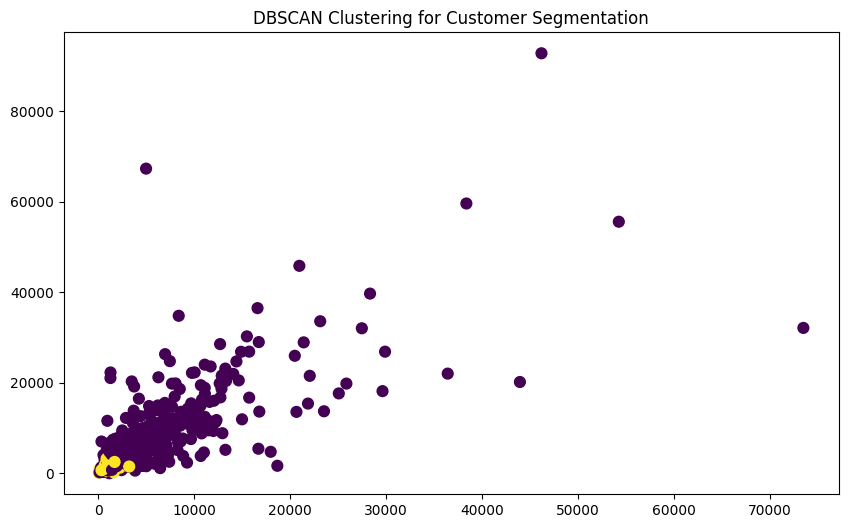

In [63]:
# DBSCAN clustering for customer segmentation
dbscan = DBSCAN(eps=0.3, min_samples=5, algorithm='ball_tree')
dbscan_labels = dbscan.fit_predict(df_standardized)

# Plot DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Grocery'], c=dbscan_labels, cmap='viridis', s=60)
plt.title('DBSCAN Clustering for Customer Segmentation')
plt.show()


### **3.2: Hierarchical Clustering**
Hierarchical clustering groups data based on a tree structure (dendrogram). It is useful for creating hierarchical clusters and visualizing them at different levels.

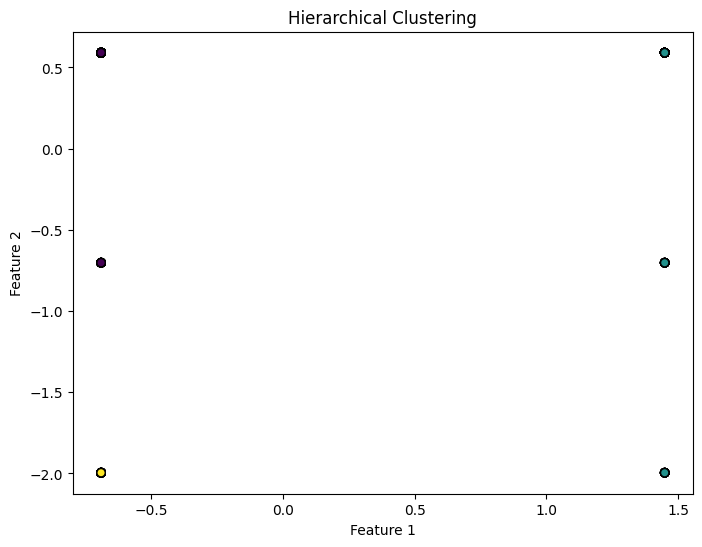

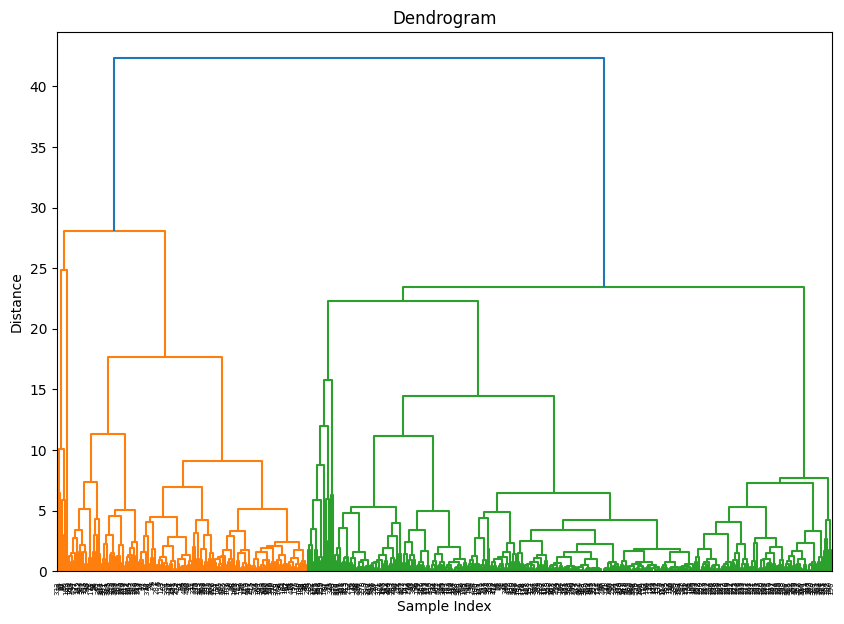

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for clustering)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Perform Hierarchical Clustering (Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Change n_clusters to desired number
agg_clustering.fit(df_standardized)

# Plot the data points with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=agg_clustering.labels_, cmap='viridis', edgecolor='k')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Compute the linkage matrix for hierarchical clustering
linked = linkage(df_standardized, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## **Step 4: Dimensionality Reduction**
### **4.1: Principal Component Analysis (PCA)**
PCA reduces the dataset to a smaller number of components while preserving the variance in the data. It's useful for visualizing high-dimensional data in 2D or 3D.

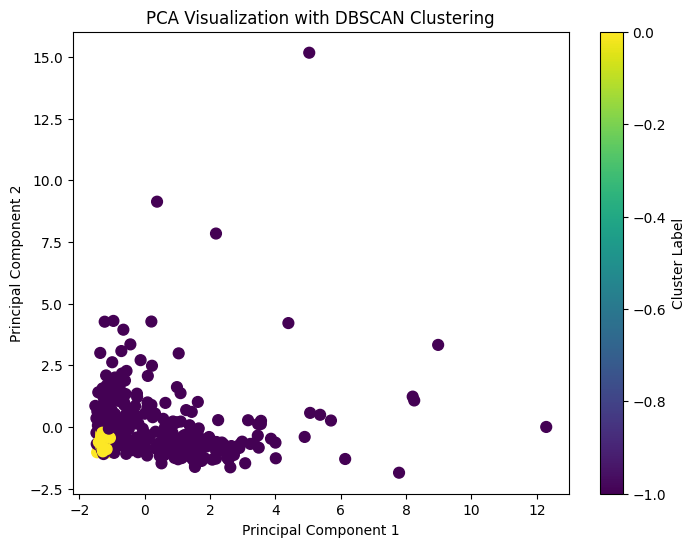

In [69]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already standardized (as in previous steps)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_standardized)

# Add DBSCAN labels to the DataFrame
df['dbscan_labels'] = dbscan_labels

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized)

# Plot the 2D PCA result with DBSCAN labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['dbscan_labels'], cmap='viridis', s=60)
plt.title("PCA Visualization with DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


### **4.2: t-Distributed Stochastic Neighbor Embedding (t-SNE)**
t-SNE is a non-linear dimensionality reduction technique that is particularly effective for visualizing clusters.



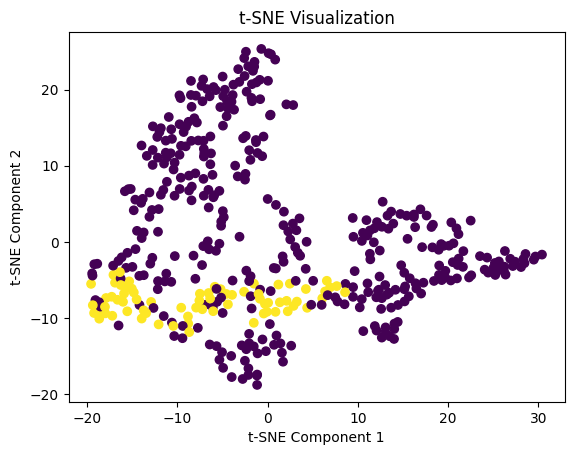

In [71]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)

# Plot the 2D t-SNE result
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['dbscan_labels'], cmap='viridis')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
